## Load libraries

In [1]:
import numpy as np
import glob
from matplotlib import pyplot as plt
from scipy import stats
from scipy.signal import savgol_filter
import seaborn as sns

from matplotlib.pyplot import cm

## Fetch data for each MD system

In [2]:
def fetch_rmsd(system_path, condition, first_resid=0, last_resid=-1):
    rmsd = []
    for i in sorted(glob.glob(system_path)):
        b = np.load(i)       
        rmsd.append(b[first_frame:last_frame]*10)
    
    return rmsd

## Plot data and print statistics

In [19]:
def plot(name):
    
    sem_rmsd_plot = []
    mean_rmsd_plot = []
    median_rmsd_plot = []
    nogly_mean = np.mean(all_rmsd[0], axis=1)
    
    #print statistics
    print("system n mean sem med p sig")
    for i,n in zip(range(len(all_rmsd)), ns):
        gly_mean = np.mean(all_rmsd[i], axis=1)
        
        stat, pvalue = stats.mannwhitneyu(nogly_mean, gly_mean)
        
        sem_rmsd = stats.sem(gly_mean)
        med_rmsd = np.median(gly_mean)
        skew = stats.skew(gly_mean)
        
        mean_rmsd_plot.append(gly_mean)
        sem_rmsd_plot.append(sem_rmsd)
        median_rmsd_plot.append(med_rmsd)
        if pvalue < 0.05/len(gly_cond):
            print(f"{gly_cond[i]} {n} {np.mean(gly_mean):.3f}  {sem_rmsd:.3f}  {med_rmsd:.3f}  {pvalue:.4f} *")
        else:
            print(f"{gly_cond[i]} {n} {np.mean(gly_mean):.3f}  {sem_rmsd:.3f}  {med_rmsd:.3f}  {pvalue:.4f} ")



    #plot violins
    color_map = cm.rainbow(np.linspace(0, 1, len(gly_cond)))
    plt.figure(figsize=(len(all_rmsd)/2,4))
    x=np.linspace(0, 0.5*(len(all_rmsd)-1), len(all_rmsd))
    
    sns.violinplot(mean_rmsd_plot, palette=color_map, inner="quartiles")
    plt.xticks(range(len(all_rmsd)), gly_cond, rotation=90)
    plt.ylim([0,6])
    plt.yticks(np.arange(0,6.5,1))
    
    #plt.savefig(f"{name}-CA-rmsd-violin.svg")

    


## SERT

system n mean sem med p sig
nogly 29 2.586  0.037  2.629  1.0000 
gly-N208 30 2.398  0.035  2.371  0.0006 *
gly-N217 30 2.513  0.055  2.485  0.1202 
gly-N208-N217 29 2.546  0.048  2.523  0.5756 


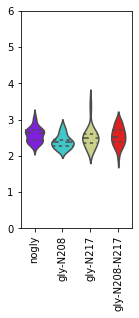

In [23]:
transporter = "SERT"


gly_cond = ['nogly', 'gly-N208', 'gly-N217',  'gly-N208-N217']
path = f"calculated_features/{transporter}/rmsd-ca/" 

first_frame, last_frame = [1000,10000]

all_rmsd = []
ns = []

for condition in gly_cond:    
    system = f"{path}/{condition}/SERT-{condition}-5HT-NaCl-CLONE*-strip.xtc-backbone-rmsd.npy"
    ns.append(len(glob.glob(system)))
    rmsd = fetch_rmsd(system, condition, first_frame, last_frame)
    
    all_rmsd.append(rmsd)

    
    
plot("SERT")



## DAT

system n mean sem med p sig
nogly 29 3.523  0.084  3.463  1.0000 
gly-N181 30 3.519  0.079  3.553  0.8735 
gly-N188 29 3.516  0.082  3.428  0.7206 
gly-N205 29 3.365  0.073  3.455  0.2251 
gly-N181-N188 30 3.675  0.061  3.632  0.1748 
gly-N181-N205 30 3.215  0.060  3.265  0.0085 
gly-N188-N205 29 3.406  0.070  3.444  0.3428 
gly-N181-N188-N205 30 3.438  0.079  3.465  0.4439 


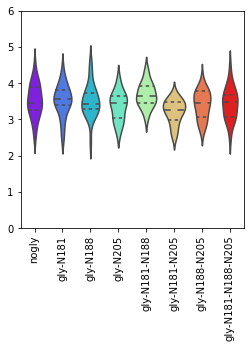

In [26]:
transporter = "DAT"

gly_cond = ['nogly', 'gly-N181','gly-N188', 'gly-N205', 
           'gly-N181-N188', 'gly-N181-N205', 
           'gly-N188-N205', 'gly-N181-N188-N205']

path = f"calculated_features/{transporter}/rmsd-ca/" 

first_frame, last_frame = [1000,10000]

all_rmsd = []
cat_rmsd = []
ns = []
a = []
for condition in gly_cond:    
    system = f"{path}/{condition}/DAT-{condition}-DA-NaCl-CLONE*-strip.xtc-backbone-rmsd.npy"
    ns.append(len(glob.glob(system)))
    rmsd = fetch_rmsd(system, condition, first_frame, last_frame)
    
    all_rmsd.append(rmsd)
    
plot("DAT")



## B0AT1

system n mean sem med p sig
no-gly 30 3.183  0.086  3.105  1.0000 
gly-N158 29 3.155  0.068  3.057  0.8142 
gly-N182 29 3.148  0.073  3.083  0.6767 
gly-N158-N182 30 3.170  0.059  3.119  0.9705 


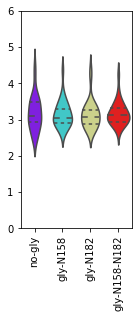

In [28]:
transporter ="B0AT1"

gly_cond = ['no-gly', 'gly-N158', 'gly-N182',  'gly-N158-N182']

path = f"calculated_features/{transporter}/rmsd-ca/" 

first_frame, last_frame = [1000,10000]

all_rmsd = []
cat_rmsd = []
a= []
ns = []
for condition in gly_cond:    
    system = f"{path}/{condition}/B0AT1-{condition}-LEU-NaCl-CLONE*-strip.xtc-backbone-rmsd.npy"
    ns.append(len(glob.glob(system)))
    rmsd = fetch_rmsd(system, condition, first_frame, last_frame)
    
    all_rmsd.append(rmsd)
    
plot("B0AT1")

## GlyT1

system n mean sem med p sig
nogly 30 3.932  0.074  3.886  1.0000 
gly-N237 30 3.757  0.083  3.699  0.1154 
gly-N240 30 3.918  0.049  3.959  0.5793 
gly-N250 29 3.859  0.057  3.831  0.6222 
gly-N256 30 3.875  0.054  3.883  0.9587 
gly-N237-N240 30 3.825  0.059  3.796  0.5298 
gly-N237-N250 29 3.976  0.087  3.846  0.8025 
gly-N237-N256 30 3.907  0.080  3.879  0.8766 
gly-N240-N250 30 3.959  0.059  3.991  0.5895 
gly-N240-N256 30 3.870  0.065  3.956  0.9234 
gly-N250-N256 30 3.980  0.082  3.881  0.6627 
gly-N237-N240-N250 29 3.862  0.044  3.868  0.9456 
gly-N237-N240-N256 30 3.948  0.051  3.977  0.4553 
gly-N237-N250-N256 30 3.996  0.055  3.988  0.2973 
gly-N240-N250-N256 30 3.914  0.062  3.958  0.8073 
gly-N237-N240-N250-N256 30 3.979  0.061  3.989  0.4643 


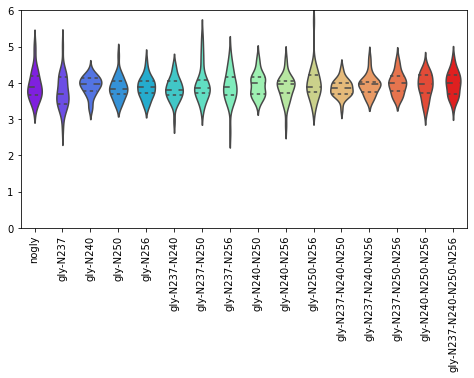

In [29]:
transporter ="GLYT1"

gly_cond = ["nogly",
            "gly-N237", "gly-N240", "gly-N250", "gly-N256",
            "gly-N237-N240", "gly-N237-N250", "gly-N237-N256",
            "gly-N240-N250", "gly-N240-N256", "gly-N250-N256",
            "gly-N237-N240-N250", "gly-N237-N240-N256",
            "gly-N237-N250-N256", "gly-N240-N250-N256",
            "gly-N237-N240-N250-N256"]

path = f"calculated_features/{transporter}/rmsd-ca/" 

first_frame, last_frame = [1000,10000]

all_rmsd = []
cat_rmsd = []
a = []
ns = []
for condition in gly_cond:    
    system = f"{path}/{condition}/GLYT-{condition}-ZG-NaCl-CLONE*-strip.xtc-backbone-rmsd.npy"
    ns.append(len(glob.glob(system)))
    rmsd = fetch_rmsd(system, condition, first_frame, last_frame)
    
    all_rmsd.append(rmsd)
    
plot("GLYT1")

## SERT-oligoglycans

system n mean sem med p sig
nogly 29 2.586  0.037  2.629  1.0000 
gly-N208-N217 29 2.546  0.048  2.523  0.5756 
2gly-N208-N217 30 2.469  0.032  2.454  0.0371 
5branch-gly-N208-N217 30 2.435  0.041  2.473  0.0216 
9branch-gly-N208-N217 30 2.497  0.032  2.515  0.1563 


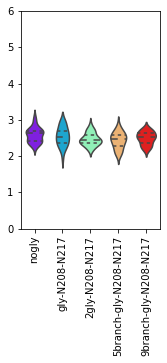

In [30]:
transporter = "SERT"


gly_cond = ['nogly', 'gly-N208-N217', '2gly-N208-N217', '5branch-gly-N208-N217', '9branch-gly-N208-N217']
path = f"calculated_features/{transporter}/rmsd-ca/" 

first_frame, last_frame = [1000,10000]

all_rmsd = []
ns = []

for condition in gly_cond:    
    system = f"{path}/{condition}/SERT-{condition}-5HT-NaCl-CLONE*-strip.xtc-backbone-rmsd.npy"
    ns.append(len(glob.glob(system)))
    rmsd = fetch_rmsd(system, condition, first_frame, last_frame)
    
    all_rmsd.append(rmsd)

    
    
plot("SERT-multi")



## DAT-oligoglycans

system n mean sem med p sig
nogly 29 3.523  0.084  3.463  1.0000 
gly-N181-N188-N205 30 3.438  0.079  3.465  0.4439 
2gly-N181-N188-N205 29 3.627  0.071  3.607  0.3428 
5branch-gly-N181-N188-N205 30 3.628  0.070  3.628  0.4173 
9branch-gly-N181-N188-N205 30 3.376  0.083  3.402  0.2651 


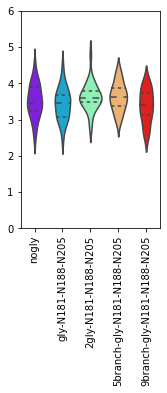

In [31]:
transporter="DAT"

gly_cond = ['nogly', 'gly-N181-N188-N205', '2gly-N181-N188-N205', 
            '5branch-gly-N181-N188-N205', '9branch-gly-N181-N188-N205']

path = f"calculated_features/{transporter}/rmsd-ca/" 

first_frame, last_frame = [1000,10000]

all_rmsd = []
cat_rmsd = []
ns = []
a = []
for condition in gly_cond:    
    system = f"{path}/{condition}/DAT-{condition}-DA-NaCl-CLONE*-strip.xtc-backbone-rmsd.npy"
    ns.append(len(glob.glob(system)))
    rmsd = fetch_rmsd(system, condition, first_frame, last_frame)
    
    all_rmsd.append(rmsd)
    
plot("DAT-multi")



## B0AT1-oligoglycans

system n mean sem med p sig
no-gly 30 3.183  0.086  3.105  1.0000 
gly-N158-N182 30 3.170  0.059  3.119  0.9705 
2gly-N158-N182 30 3.163  0.093  3.028  0.5895 
5branch-gly-N158-N182 29 2.982  0.062  2.979  0.1000 
9branch-gly-N158-N182 29 3.317  0.106  3.157  0.5392 


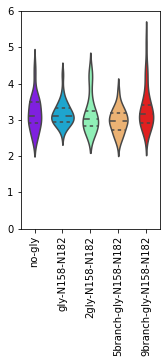

In [32]:
transporter = "B0AT1"

gly_cond = ['no-gly', 'gly-N158-N182', '2gly-N158-N182', '5branch-gly-N158-N182', '9branch-gly-N158-N182']

path = f"calculated_features/{transporter}/rmsd-ca/" 

first_frame, last_frame = [1000,10000]

all_rmsd = []
cat_rmsd = []
ns = []
for condition in gly_cond:    
    system = f"{path}/{condition}/B0AT1-{condition}-LEU-NaCl-CLONE*-strip.xtc-backbone-rmsd.npy"
    ns.append(len(glob.glob(system)))
    rmsd = fetch_rmsd(system, condition, first_frame, last_frame)
    
    all_rmsd.append(rmsd)
    
plot("B0AT1-multi")

## GlyT1-oligoglycans

system n mean sem med p sig
nogly 30 3.932  0.074  3.886  1.0000 
gly-N237-N240-N250-N256 30 3.979  0.061  3.989  0.4643 
2gly-N237-N240-N250-N256 30 3.538  0.042  3.531  0.0001 *
5branch-gly-N237-N240-N250-N256 30 3.498  0.044  3.540  0.0000 *
9branch-gly-N237-N240-N250-N256 30 3.308  0.059  3.267  0.0000 *


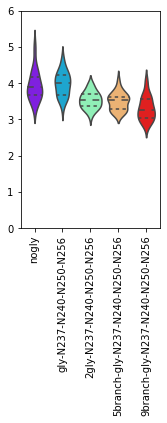

In [33]:
transporter="GLYT1"

gly_cond = ["nogly",
            "gly-N237-N240-N250-N256",
            "2gly-N237-N240-N250-N256",
           "5branch-gly-N237-N240-N250-N256",
           "9branch-gly-N237-N240-N250-N256"]

path = f"calculated_features/{transporter}/rmsd-ca/" 

first_frame, last_frame = [1000,10000]

all_rmsd = []
cat_rmsd = []
a = []
ns = []
for condition in gly_cond:    
    system = f"{path}/{condition}/GLYT-{condition}-ZG-NaCl-CLONE*-strip.xtc-backbone-rmsd.npy"
    ns.append(len(glob.glob(system)))
    rmsd = fetch_rmsd(system, condition, first_frame, last_frame)
    
    all_rmsd.append(rmsd)
    
plot("GLYT1-multi")